In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice
from collections import Counter
import datetime
import plotly.express as px

In [2]:
#Accessing the excel sheet
x = pd.ExcelFile('Analysis Exercise.xlsx')
x.sheet_names

['Instructions',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 'Peak Points']

In [3]:
df = pd.DataFrame()
df.head()

""


In [4]:
#Selecting only the required sheets
all_dfs_except_two=['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']

In [5]:
columns=None

for idx, name in enumerate(all_dfs_except_two):
    sheet = x.parse(name)
    if idx == 0:
        columns = sheet.columns
    sheet.columns = columns
    df = df.append(sheet, ignore_index=True) #Appending all the sheets into a single dataframe
    
#Reference: https://www.caktusgroup.com/blog/2019/08/13/import-multiple-excel-sheets-pandas/

In [6]:
#Printing the first 5 rows to check the data
df.head()

,Unnamed: 0,Unnamed: 1,30,15,5,1,REVERSE,15.1,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK
1,"INDEPENDENT WOMAN, PART I (from ""CHARLIE'S ANG...",DESTINY'S CHILD,7,17,23,28,1,4,668,140,808,2000,2000-11-05 00:00:00,2000-11-26 00:00:00,4
2,"DOESN'T REALLY MATTER (from ""NUTTY PROFESSOR"")","JACKSON, JANET",8,13,22,25,1,5,645,140,785,2000,2000-07-23 00:00:00,2000-08-20 00:00:00,5
3,I KNEW I LOVED YOU,SAVAGE GARDEN,2,21,30,33,1,3,603,140,743,2000,1999-11-07 00:00:00,2000-01-23 00:00:00,12
4,MAMBO NO. 5 (A LITTLE BIT…),"BEGA, LOU",2,17,29,35,1,4,555,140,695,2000,1999-09-26 00:00:00,2000-01-09 00:00:00,16


In [7]:
#Adding the header to the dataframe

new_header = df.iloc[0] #grabbing the first row for the header
df = df[1:] #taking the dataframe without first row
df.columns = new_header #setting the header row as the df header

In [8]:
df.describe()

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK
count,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801
unique,1708,868,14,32,42,48,52,12,418,52,510,11,523,489,56
top,SONG TITLE,"SPEARS, BRITNEY",0,0,0,14,1,0,4,140,11,2003,DEBUT DATE,2000-03-05 00:00:00,9
freq,9,21,1616,1219,621,102,176,1126,76,176,22,205,9,12,176


In [9]:
#Checking the column names
df.columns

Index(['SONG TITLE', 'ARTIST', 'WEEKS AT #1', 'WEEKS TOP 10', 'WEEKS TOP 25',
       'WEEKS TOP 50', 'PEAK POSITION', 'BONUS WEEKS', 'SUB POINTS',
       'PEAK POINTS', 'TOTAL POINTS', 'PEAK YEAR', 'DEBUT DATE', 'PEAK DATE',
       'WEEKS TO REACH PEAK'],
      dtype='object', name=0)

In [10]:
df.dtypes

0
SONG TITLE             object
ARTIST                 object
WEEKS AT #1            object
WEEKS TOP 10           object
WEEKS TOP 25           object
WEEKS TOP 50           object
PEAK POSITION          object
BONUS WEEKS            object
SUB POINTS             object
PEAK POINTS            object
TOTAL POINTS           object
PEAK YEAR              object
DEBUT DATE             object
PEAK DATE              object
WEEKS TO REACH PEAK    object
dtype: object

In [16]:
#Chaning the data types as needed

df = df.astype({"SONG TITLE":str,"ARTIST":str,"WEEKS AT #1":int,"WEEKS TOP 10":int,"WEEKS TOP 25":int,"WEEKS TOP 50":int,
                "PEAK POSITION":int,"BONUS WEEKS":int,"SUB POINTS":int,"PEAK POINTS":int,"TOTAL POINTS":int,
                "PEAK YEAR":int,"WEEKS TO REACH PEAK":int})
df['DEBUT DATE'] = df['DEBUT DATE'].astype('datetime64[ns]')
df['PEAK DATE'] = df['PEAK DATE'].astype('datetime64[ns]')

In [17]:
df.dtypes

0
SONG TITLE                     object
ARTIST                         object
WEEKS AT #1                     int32
WEEKS TOP 10                    int32
WEEKS TOP 25                    int32
WEEKS TOP 50                    int32
PEAK POSITION                   int32
BONUS WEEKS                     int32
SUB POINTS                      int32
PEAK POINTS                     int32
TOTAL POINTS                    int32
PEAK YEAR                       int32
DEBUT DATE             datetime64[ns]
PEAK DATE              datetime64[ns]
WEEKS TO REACH PEAK             int32
dtype: object

In [18]:
list_of_rows=df.query('ARTIST=="ARTIST"').index

#Reference:https://cmdlinetips.com/2019/10/how-to-drop-rows-based-on-a-column-value-in-pandas-dataframe/

In [19]:
#Dropping the repeated rows
df=df.drop(list_of_rows)

In [20]:
df

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK
1,"INDEPENDENT WOMAN, PART I (from ""CHARLIE'S ANG...",DESTINY'S CHILD,7,17,23,28,1,4,668,140,808,2000,2000-11-05,2000-11-26,4
2,"DOESN'T REALLY MATTER (from ""NUTTY PROFESSOR"")","JACKSON, JANET",8,13,22,25,1,5,645,140,785,2000,2000-07-23,2000-08-20,5
3,I KNEW I LOVED YOU,SAVAGE GARDEN,2,21,30,33,1,3,603,140,743,2000,1999-11-07,2000-01-23,12
4,MAMBO NO. 5 (A LITTLE BIT…),"BEGA, LOU",2,17,29,35,1,4,555,140,695,2000,1999-09-26,2000-01-09,16
5,BYE BYE BYE,'N SYNC,5,14,19,23,1,5,553,140,693,2000,2000-02-27,2000-03-26,5
6,IT'S GONNA BE ME,'N SYNC,5,11,17,22,1,5,497,140,637,2000,2000-06-04,2000-07-09,6
7,WANTING,"ANDERS, GABRIELA",1,17,25,35,1,2,475,140,615,2000,1999-12-05,2000-03-19,16
8,I HOPE YOU DANCE,"WOMACK, LEE ANN",1,16,23,30,1,4,475,140,615,2000,2000-07-30,2000-11-05,15
9,WHO LET THE DOGS OUT,BAHA MEN,2,12,20,28,1,5,443,140,583,2000,2000-09-17,2000-11-12,9
10,MUSIC,MADONNA,3,12,16,21,1,4,431,140,571,2000,2000-08-20,2000-10-15,9


The data seems to be clean now. Let's start our analysis!

In [21]:
# 1 What were the top 10 songs of the decade 2000-2009? 
df.nlargest(10,'TOTAL POINTS')

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK
1292,GLAMOROUS,FERGIE featuring LUDACRIS,11,32,40,50,1,9,1195,140,1335,2007,2007-01-28,2007-02-18,4
1293,BEFORE HE CHEATS,"UNDERWOOD, CARRIE",3,42,43,57,1,4,1052,140,1192,2007,2006-11-05,2007-06-03,31
349,NO SUCH THING,"MAYER, JOHN",13,20,32,42,1,9,1027,140,1167,2002,2002-05-26,2002-06-23,5
553,CITY LOVE,"MAYER, JOHN",10,29,33,37,1,6,1027,140,1167,2003,2003-02-16,2003-03-30,7
350,VIDEO,INDIA.ARIE,8,29,34,39,1,7,989,140,1129,2002,2002-02-17,2002-03-24,6
554,WHERE IS THE LOVE?,BLACK EYED PEAS featuring JUSTIN TIMBERLAKE,9,27,36,41,1,5,971,140,1111,2003,2003-05-25,2003-06-29,6
943,TWO WEEKS FROM TWENTY,YELLOWCARD,8,27,38,46,1,6,971,140,1111,2005,2005-07-31,2005-09-11,7
1454,AMERICAN BOY,ESTELLE featuring KANYE WEST,11,26,29,37,1,2,932,140,1072,2008,2008-06-15,2008-08-24,11
1112,TIME OF YOUR LIFE (GOOD RIDDANCE),GREEN DAY,0,38,49,65,2,2,910,130,1040,2006,2005-09-25,2005-12-11,12
200,SOMEONE TO CALL MY LOVER,"JACKSON, JANET",10,24,27,32,1,3,872,140,1012,2001,2001-07-22,2001-07-29,2


In [22]:
# 2 What was the most commonly used word in a song title for the decade 2000-2009?
l=pd.DataFrame(Counter(" ".join(df["SONG TITLE"]).split()).most_common(5))
l.columns=['Common Word','Count']
l

,Common Word,Count
0,YOU,166
1,THE,161
2,I,129
3,ME,112
4,IT,83


In [23]:
# 3a Number of songs that reached its peak in 1 week of release?

c=0
for i in df['WEEKS TO REACH PEAK'].iteritems():
    if(i[1]==1):
        c=c+1
print(c)

31


In [24]:
# 3b Did any song reach #1 position?

df[(df['WEEKS TO REACH PEAK']==1) & (df['PEAK POSITION']==1)]

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK


We can see that none of the songs which have reached it's peak position in a week had peak position 1.

In [25]:
# 4 What song took the longest to reach it's peak position in the decade 2000-2009?

df[df['WEEKS TO REACH PEAK'] == df['WEEKS TO REACH PEAK'].max()]

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK
799,I'M STILL IN LOVE WITH YOU,"PAUL, SEAN",0,6,17,28,5,1,218,115,333,2004,2004-04-11,2009-08-08,278


The song 'I'M STILL IN LOVE WITH YOU' took 278 weeks to reach the peak position, which can be seen as #5.

Checking if there is any other song which took so long to raech the peak position.

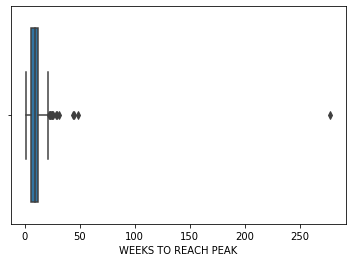

In [26]:
#Box plot helps us identify the outliers.
import seaborn as sns
sns.boxplot(x=df['WEEKS TO REACH PEAK'])

There seems to be only one such song. To make the analysis better, I have decided to drop the outlier.

In [27]:
df=df.drop(799)

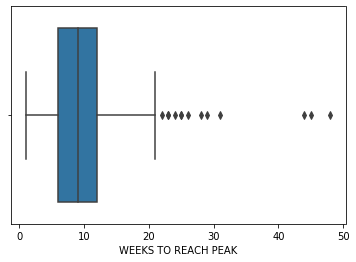

In [28]:
sns.boxplot(x=df['WEEKS TO REACH PEAK'])

In [29]:
#Creating a new column for month of the debut date.
df['DEBUT MONTH'] = df['DEBUT DATE'].dt.month

In [30]:
df.head()

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK,DEBUT MONTH
1,"INDEPENDENT WOMAN, PART I (from ""CHARLIE'S ANG...",DESTINY'S CHILD,7,17,23,28,1,4,668,140,808,2000,2000-11-05,2000-11-26,4,11
2,"DOESN'T REALLY MATTER (from ""NUTTY PROFESSOR"")","JACKSON, JANET",8,13,22,25,1,5,645,140,785,2000,2000-07-23,2000-08-20,5,7
3,I KNEW I LOVED YOU,SAVAGE GARDEN,2,21,30,33,1,3,603,140,743,2000,1999-11-07,2000-01-23,12,11
4,MAMBO NO. 5 (A LITTLE BIT…),"BEGA, LOU",2,17,29,35,1,4,555,140,695,2000,1999-09-26,2000-01-09,16,9
5,BYE BYE BYE,'N SYNC,5,14,19,23,1,5,553,140,693,2000,2000-02-27,2000-03-26,5,2


Text(0, 0.5, 'Average weeks to reach peak position')

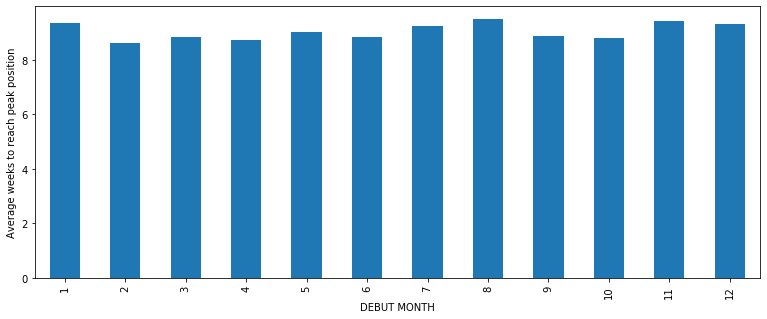

In [31]:
# 5 Does the release month effect the average number of weeks to reach peak? 
df['WEEKS TO REACH PEAK'].groupby(df['DEBUT MONTH']).mean()
df['WEEKS TO REACH PEAK'].groupby(df['DEBUT MONTH']).mean().plot(kind='bar',figsize=(13,5))
plt.ylabel('Average weeks to reach peak position')

We can see that the release month does not effect the weeks to reach peak position, as all the months almost have the same average value.

In [32]:
# 6 Who is the artist with highest number of releases? How many of her songs were in #1?

#Counting the songs using groupby function
artistdf=pd.DataFrame(df['ARTIST'].groupby(df['ARTIST']).count().to_dict().items(),columns=['Artist','SongsCount'])

In [33]:
artistdf[artistdf.SongsCount==artistdf.SongsCount.max()]

,Artist,SongsCount
718,"SPEARS, BRITNEY",21


BRITNEY SPEARS has the highest number of songs released. Now let's find out how many of her songs were at #1 position.

In [34]:
df[df.ARTIST==artistdf[artistdf.SongsCount==artistdf.SongsCount.max()].Artist.item()][df['WEEKS AT #1']>0]['SONG TITLE'].item()

#df.ARTIST==artistdf[artistdf.SongsCount==artistdf.SongsCount.max()].Artist.item() -> returns the artist with max song count
#df['WEEKS AT #1']>0 -> to checkif the selected song is at #1 or not

D:\Python\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



'WOMANIZER'

The song 'WOMANIZER' seems to be the only song which was at #1 out of the 21 songs.

We can change this to 'code' cell to check the answer manually.

peak=pd.DataFrame(df[df['ARTIST']=='SPEARS, BRITNEY'])
peak

Text(0, 0.5, 'Number of songs')

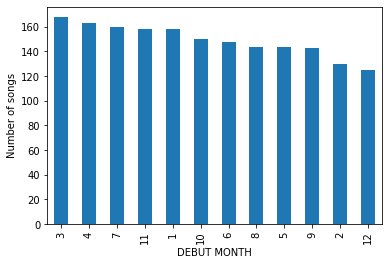

In [35]:
# 7 Which month has highest number of songs released?
max_songs_month=df['ARTIST'].groupby(df['DEBUT MONTH']).count().max()
df['ARTIST'].groupby(df['DEBUT MONTH']).count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Number of songs")

March has the highest number of songs released.

In [36]:
#8 Percentage of songs that reached 1st position in the max month?

songs_reached_1=df[(df['DEBUT MONTH']==3) & (df['PEAK POSITION']==1)]['ARTIST'].count()
per_reached_1=songs_reached_1/max_songs_month*100
per_reached_1

11.30952380952381

In [37]:
#9 Who spent the most weeks at #1 for the decade 2000-2009?

df[df['WEEKS AT #1']==df['WEEKS AT #1'].max()]

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK,DEBUT MONTH
349,NO SUCH THING,"MAYER, JOHN",13,20,32,42,1,9,1027,140,1167,2002,2002-05-26,2002-06-23,5,5


In [38]:
#Creating a dataframe with songs having featurings
featuringdf=df[df['ARTIST'].str.contains("featuring")]

In [39]:
featuringdf

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK,DEBUT MONTH
12,MARIA MARIA,SANTANA featuring WYCLEF JEAN,3,12,17,22,1,3,422,140,562,2000,2000-03-05,2000-05-14,11,3
51,PUT YOUR LIGHTS ON,SANTANA featuring EVERLAST,0,4,12,20,7,0,140,105,245,2000,2000-02-20,2000-05-28,15,2
74,LOVE OF MY LIFE,SANTANA featuring DAVE MATTHEWS,0,0,9,16,12,0,61,82,143,2000,2000-10-01,2000-12-17,12,10
87,PRIVATE EMOTION,"MARTIN, RICKY featuring MEJA",0,0,8,19,18,0,59,64,123,2000,2000-04-16,2000-07-23,15,4
186,HOT BOYZ,"MISSY ELLIOTT featuring NAS, EVE & Q-TIP",0,0,0,5,41,0,5,10,15,2000,2000-01-16,2000-02-06,4,1
202,I'M REAL,"LOPEZ, JENNIFER featuring JA RULE",5,20,24,31,1,8,721,140,861,2001,2001-07-29,2001-10-21,13,7
203,IT WASN'T ME,SHAGGY featuring RICARDO DUCENT,5,20,26,34,1,5,689,140,829,2001,2000-11-26,2001-02-18,13,11
204,LET ME BLOW YA MIND,EVE featuring GWEN STEFANI,1,24,31,42,1,2,617,140,757,2001,2001-04-29,2001-11-04,28,4
217,RIDE WIT ME,NELLY featuring CITY SPUD,1,10,17,26,1,0,291,140,431,2001,2001-03-11,2001-06-17,15,3
224,ANGEL,SHAGGY featuring RAYVON,0,10,15,21,2,1,261,130,391,2001,2001-01-21,2001-04-15,13,1


In [40]:
new = featuringdf["ARTIST"].str.split("featuring", n = 1, expand = True) 
  
# making separate first name column from new data frame 
featuringdf["featuring artist"]= new[1] #Creating a column with the name of the featuring artist
featuringdf["actual_artist"]=new[0] #Creating a column with the name of the actual artist

actual_artist=pd.DataFrame(new[0])

D:\Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\Python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [41]:
featuringdf

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK,DEBUT MONTH,featuring artist,actual_artist
12,MARIA MARIA,SANTANA featuring WYCLEF JEAN,3,12,17,22,1,3,422,140,562,2000,2000-03-05,2000-05-14,11,3,WYCLEF JEAN,SANTANA
51,PUT YOUR LIGHTS ON,SANTANA featuring EVERLAST,0,4,12,20,7,0,140,105,245,2000,2000-02-20,2000-05-28,15,2,EVERLAST,SANTANA
74,LOVE OF MY LIFE,SANTANA featuring DAVE MATTHEWS,0,0,9,16,12,0,61,82,143,2000,2000-10-01,2000-12-17,12,10,DAVE MATTHEWS,SANTANA
87,PRIVATE EMOTION,"MARTIN, RICKY featuring MEJA",0,0,8,19,18,0,59,64,123,2000,2000-04-16,2000-07-23,15,4,MEJA,"MARTIN, RICKY"
186,HOT BOYZ,"MISSY ELLIOTT featuring NAS, EVE & Q-TIP",0,0,0,5,41,0,5,10,15,2000,2000-01-16,2000-02-06,4,1,"NAS, EVE & Q-TIP",MISSY ELLIOTT
202,I'M REAL,"LOPEZ, JENNIFER featuring JA RULE",5,20,24,31,1,8,721,140,861,2001,2001-07-29,2001-10-21,13,7,JA RULE,"LOPEZ, JENNIFER"
203,IT WASN'T ME,SHAGGY featuring RICARDO DUCENT,5,20,26,34,1,5,689,140,829,2001,2000-11-26,2001-02-18,13,11,RICARDO DUCENT,SHAGGY
204,LET ME BLOW YA MIND,EVE featuring GWEN STEFANI,1,24,31,42,1,2,617,140,757,2001,2001-04-29,2001-11-04,28,4,GWEN STEFANI,EVE
217,RIDE WIT ME,NELLY featuring CITY SPUD,1,10,17,26,1,0,291,140,431,2001,2001-03-11,2001-06-17,15,3,CITY SPUD,NELLY
224,ANGEL,SHAGGY featuring RAYVON,0,10,15,21,2,1,261,130,391,2001,2001-01-21,2001-04-15,13,1,RAYVON,SHAGGY


In [42]:
#10  Which 5 artists have featured the most in songs?

featuringdf['featuring artist'].value_counts().nlargest(5)

 T-PAIN               9
 AKON                 7
 LUDACRIS             6
 JUSTIN TIMBERLAKE    5
 JAY-Z                5
Name: featuring artist, dtype: int64

In [43]:
#11 does featuring artist effect the total points?

featuringlist=pd.DataFrame(featuringdf['ARTIST'])

In [44]:
#Creating a dataframe with songs without featuring artists
listwithoutf=pd.DataFrame(df[~df.ARTIST.isin(featuringlist.ARTIST)])

In [45]:
listwithoutf

,SONG TITLE,ARTIST,WEEKS AT #1,WEEKS TOP 10,WEEKS TOP 25,WEEKS TOP 50,PEAK POSITION,BONUS WEEKS,SUB POINTS,PEAK POINTS,TOTAL POINTS,PEAK YEAR,DEBUT DATE,PEAK DATE,WEEKS TO REACH PEAK,DEBUT MONTH
1,"INDEPENDENT WOMAN, PART I (from ""CHARLIE'S ANG...",DESTINY'S CHILD,7,17,23,28,1,4,668,140,808,2000,2000-11-05,2000-11-26,4,11
2,"DOESN'T REALLY MATTER (from ""NUTTY PROFESSOR"")","JACKSON, JANET",8,13,22,25,1,5,645,140,785,2000,2000-07-23,2000-08-20,5,7
3,I KNEW I LOVED YOU,SAVAGE GARDEN,2,21,30,33,1,3,603,140,743,2000,1999-11-07,2000-01-23,12,11
4,MAMBO NO. 5 (A LITTLE BIT…),"BEGA, LOU",2,17,29,35,1,4,555,140,695,2000,1999-09-26,2000-01-09,16,9
5,BYE BYE BYE,'N SYNC,5,14,19,23,1,5,553,140,693,2000,2000-02-27,2000-03-26,5,2
6,IT'S GONNA BE ME,'N SYNC,5,11,17,22,1,5,497,140,637,2000,2000-06-04,2000-07-09,6,6
7,WANTING,"ANDERS, GABRIELA",1,17,25,35,1,2,475,140,615,2000,1999-12-05,2000-03-19,16,12
8,I HOPE YOU DANCE,"WOMACK, LEE ANN",1,16,23,30,1,4,475,140,615,2000,2000-07-30,2000-11-05,15,7
9,WHO LET THE DOGS OUT,BAHA MEN,2,12,20,28,1,5,443,140,583,2000,2000-09-17,2000-11-12,9,9
10,MUSIC,MADONNA,3,12,16,21,1,4,431,140,571,2000,2000-08-20,2000-10-15,9,8


Creating two dataframes with artist name and total points. One being with featuring artist(f) and the other being without featuring artists(nf).

In [46]:
f_avg=pd.DataFrame(featuringdf['TOTAL POINTS'].groupby(featuringdf['actual_artist']).mean())
f_avg=f_avg.reset_index()
f_avg['actual_artist'] = f_avg['actual_artist'].astype(str)
f_avg.columns=['ARTIST','TOTAL POINTS']
f=pd.DataFrame(f_avg.sort_values(by=['TOTAL POINTS'], ascending=False).head(15))
f=f.reset_index()
f.columns=['initial_index','ARTIST','Total points with featuring artists']
f

,initial_index,ARTIST,Total points with featuring artists
0,39,FERGIE,1335.0
1,10,BLACK EYED PEAS,1111.0
2,34,ESTELLE,700.5
3,43,"FOXX, JAMIE",618.0
4,107,SHAGGY,610.0
5,35,EVE,603.5
6,25,COUNTING CROWS,589.0
7,0,'N SYNC,505.0
8,53,"JACKSON, JANET",488.5
9,85,NO DOUBT,485.0


In [47]:
nf_avg=pd.DataFrame(listwithoutf['TOTAL POINTS'].groupby(listwithoutf['ARTIST']).mean())
nf_avg=nf_avg.reset_index()
nf_avg['ARTIST'] = nf_avg['ARTIST'].astype(str)
nf=pd.DataFrame(nf_avg.sort_values(by=['TOTAL POINTS'], ascending=False).head(15))
nf=nf.reset_index()
nf.columns=['initial_index','ARTIST','Total points without featuring artists']
nf

,initial_index,ARTIST,Total points without featuring artists
0,345,LOS LONELY BOYS,928.0
1,459,"POWTER, DANIEL",779.0
2,268,INDIA.ARIE,763.5
3,473,"RAE, CORRINE BAILEY",753.5
4,564,THE ACADEMY IS,660.0
5,540,STARTING LINE,637.0
6,632,"WOMACK, LEE ANN",615.0
7,34,"ANDERS, GABRIELA",615.0
8,320,"LEGEND, JOHN",601.0
9,57,"BARKLEY, GNARLS",595.0


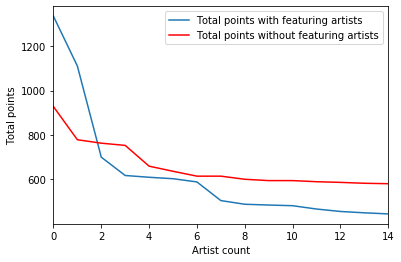

In [48]:
#Plotting the points
ax = plt.gca()

l1=f.plot(kind='line',y='Total points with featuring artists',ax=ax)
l2=nf.plot(kind='line',y='Total points without featuring artists', color='red', ax=ax)
plt.xlabel('Artist count')
plt.ylabel('Total points')
plt.show()

The graph does not show any definite relation between featuring artist and total points.

In [50]:
#Distribution of ‘TOTAL POINTS’ for the top 20 songs

df_new=pd.DataFrame()
df_new=df.nlargest(15, "TOTAL POINTS")

fig = px.pie(df_new, values='TOTAL POINTS', names='SONG TITLE')
fig.show()